# **Climate Change Prediction Using Time Series Analysis**

In [1]:
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/content/GlobalLandTemperaturesByState.csv')

In [6]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [7]:
df.dtypes

,0
dt,object
AverageTemperature,float64
AverageTemperatureUncertainty,float64
State,object
Country,object


In [8]:
df.shape

(645675, 5)

In [9]:
df.isnull().sum()

,0
dt,0
AverageTemperature,25648
AverageTemperatureUncertainty,25648
State,0
Country,0


In [10]:
df = df.dropna(how='any',axis=0)

In [11]:
df.shape

(620027, 5)

In [17]:
df= df.rename(columns={'dt':'Date'})
df.head()

,Date,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [18]:
df['Date']= pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=620027, freq=None)

In [19]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


In [20]:
df['Year'] = df.index.year
df.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year
Date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [21]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty,Year
count,620027.000000,620027.000000,620027.000000
mean,8.993111,1.287647,1902.331598
std,13.772150,1.360392,67.831393
min,-45.389000,0.036000,1743.000000
25%,-0.693000,0.316000,1851.000000
50%,11.199000,0.656000,1906.000000
75%,19.899000,1.850000,1960.000000
max,36.339000,12.646000,2013.000000


In [23]:
df.sort_index(inplace=True)
latest_df = df.loc['1980':'2013']
latest_df.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year
Date,,,,,
1980-01-01,-12.241,0.182,Tver',Russia,1980
1980-01-01,-20.507,0.325,Tyumen',Russia,1980
1980-01-01,-28.288,0.303,Yukon,Canada,1980
1980-01-01,12.450,0.315,Punjab,India,1980
1980-01-01,-11.009,0.211,Bryansk,Russia,1980


In [24]:
latest_df[['Country','AverageTemperature']].groupby(['Country']).mean().sort_values(by='AverageTemperature')

,AverageTemperature
Country,
Canada,-0.681256
Russia,2.432833
United States,11.516373
China,12.150210
Australia,18.447621
India,22.871669
Brazil,24.537580


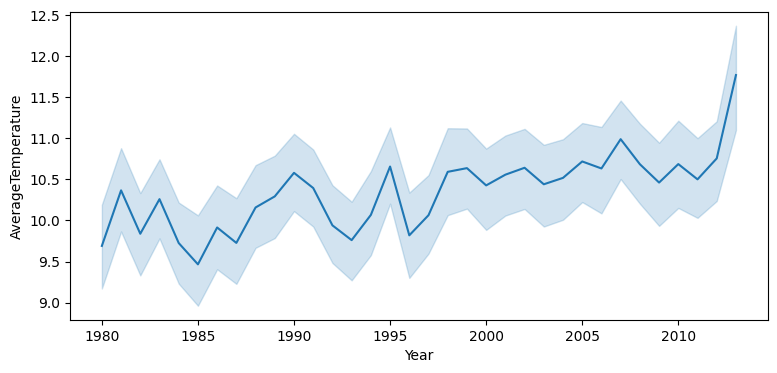

In [25]:
plt.figure(figsize=(9,4))
sns.lineplot(x="Year",y="AverageTemperature",data=latest_df)
plt.show()

In [26]:
resample_df = latest_df['AverageTemperature'].resample('A').mean()
resample_df.head()

,AverageTemperature
Date,
1980-12-31,9.689856
1981-12-31,10.366578
1982-12-31,9.837958
1983-12-31,10.259516
1984-12-31,9.724950


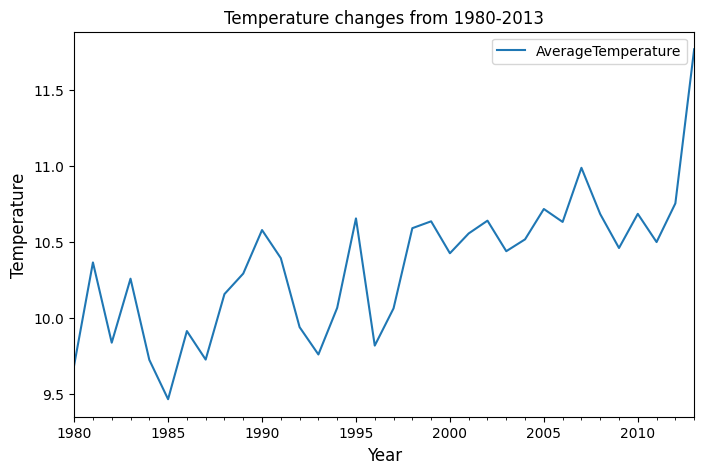

In [28]:
resample_df.plot(title='Temperature changes from 1980-2013',figsize=(8,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend()

In [30]:
from statsmodels.tsa.stattools import adfuller

print('Dickey Fuller Test Results')
test_df = adfuller(resample_df.values, autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in test_df[4].items():
  df_output['Critical Value (%s)'%key]=value
print(df_output)

Dickey Fuller Test Results
Test Statistic                 -0.728209
p-value                         0.839307
Lags Used                       2.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


on peut donc conclure que la serie n'est pas stationnaire

In [33]:
decomp= seasonal_decompose(resample_df,period=3)


trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

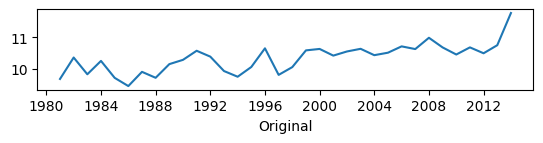

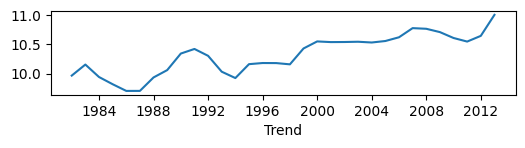

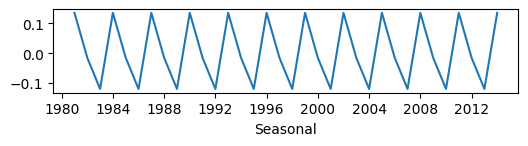

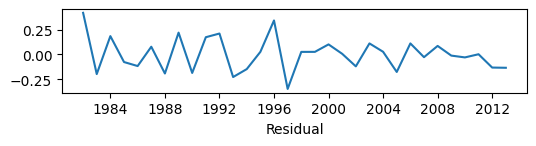

<Figure size 600x500 with 0 Axes>

In [34]:
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

plt.subplot(412)
plt.plot(trend)
plt.xlabel('Trend')
plt.figure(figsize=(6,5))

plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('Seasonal')
plt.figure(figsize=(6,5))

plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residual')
plt.figure(figsize=(6,5))

plt.tight_layout()


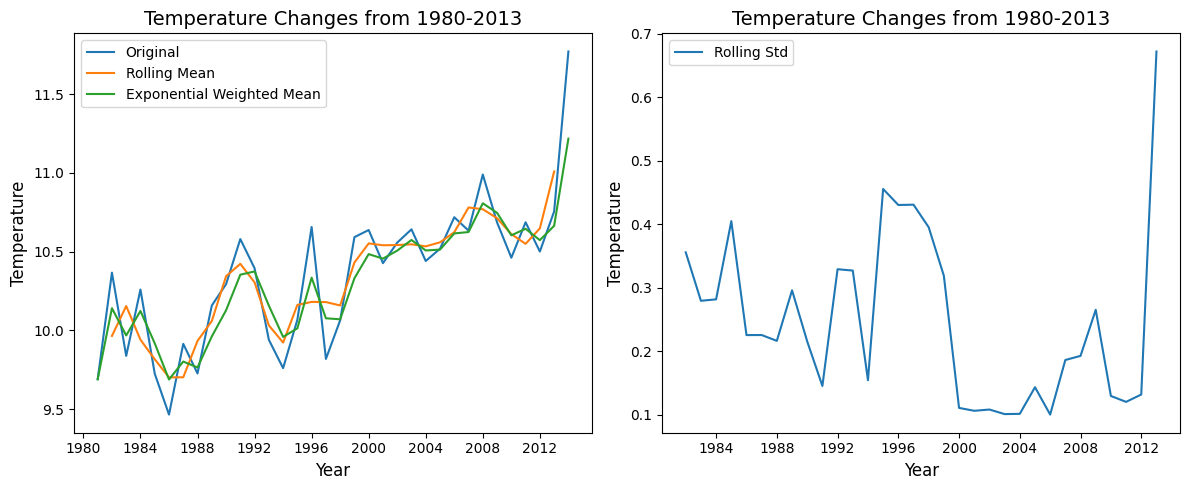

In [36]:
rol_mean = resample_df.rolling(window=3 , center=True).mean()
ewm = resample_df.ewm(span=3).mean()
rol_std = resample_df.rolling(window=3 ,  center=True).std()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

ax1.plot(resample_df,label = 'Original')
ax1.plot(rol_mean,label = 'Rolling Mean')
ax1.plot(ewm,label = 'Exponential Weighted Mean')
ax1.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax1.set_xlabel('Year',fontsize=12)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.legend()

ax2.plot(rol_std,label = 'Rolling Std')
ax2.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax2.set_xlabel('Year',fontsize=12)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

In [38]:
rol_mean.dropna(inplace = True)
ewm.dropna(inplace = True)

print('Dickey Fuller Test for the Rolling Mean :')
test_df = adfuller(rol_mean.values, autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in test_df[4].items():
  df_output['Critical Value (%s)'%key]=value
print(df_output)
print('')
print('Dickey Fuller Test for the Exponential Weighted Mean :')
test_df = adfuller(ewm.values, autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in test_df[4].items():
  df_output['Critical Value (%s)'%key]=value
print(df_output)


Dickey Fuller Test for the Rolling Mean :
Test Statistic                  0.275101
p-value                         0.976173
Lags Used                       8.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64

Dickey Fuller Test for the Exponential Weighted Mean :
Test Statistic                 -0.338693
p-value                         0.919843
Lags Used                       2.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [39]:
diff_rol_mean = resample_df - rol_mean
diff_rol_mean.dropna(inplace = True)
diff_rol_mean.head()

,AverageTemperature
Date,
1981-12-31,0.401781
1982-12-31,-0.316726
1983-12-31,0.318708
1984-12-31,-0.091684
1985-12-31,-0.236199


In [40]:
diff_ewm = resample_df - ewm
diff_ewm.dropna(inplace = True)
diff_ewm.head()

,AverageTemperature
Date,
1980-12-31,0.000000
1981-12-31,0.225574
1982-12-31,-0.129877
1983-12-31,0.136118
1984-12-31,-0.192797


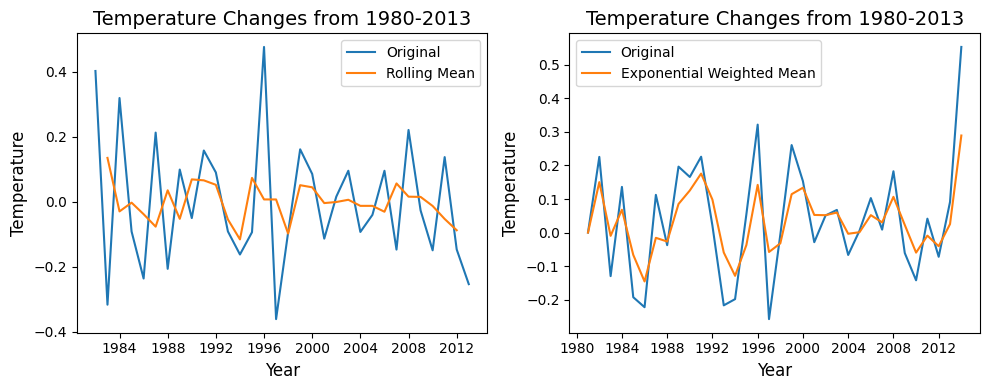

In [41]:
df_rol_mean_diff = diff_rol_mean.rolling(window=3 , center=True).mean()

df_ewm_diff = diff_ewm.ewm(span=3).mean()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

ax1.plot(diff_rol_mean,label = 'Original')
ax1.plot(df_rol_mean_diff,label = 'Rolling Mean')
ax1.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax1.set_xlabel('Year',fontsize=12)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.legend()

ax2.plot(diff_ewm,label = 'Original')
ax2.plot(df_ewm_diff,label = 'Exponential Weighted Mean')
ax2.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax2.set_xlabel('Year',fontsize=12)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.legend()
plt.tight_layout()
plt.show()


In [42]:
print('Dickey-Fuller Test for the Difference between the Original and the Rolling Mean :')
test_df = adfuller(diff_rol_mean.values, autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in test_df[4].items():
  df_output['Critical Value (%s)'%key]=value
print(df_output)
print('')
print('Dickey-Fuller Test for the Difference between the Original and the Exponential Weighted Mean :')
test_df = adfuller(diff_ewm.values, autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in test_df[4].items():
  df_output['Critical Value (%s)'%key]=value
print(df_output)



Dickey-Fuller Test for the Difference between the Original and the Rolling Mean :
Test Statistic                -7.007710e+00
p-value                        7.051586e-10
Lags Used                      1.000000e+00
Number of Observations Used    3.000000e+01
Critical Value (1%)           -3.669920e+00
Critical Value (5%)           -2.964071e+00
Critical Value (10%)          -2.621171e+00
dtype: float64

Dickey-Fuller Test for the Difference between the Original and the Exponential Weighted Mean :
Test Statistic                 -4.297446
p-value                         0.000449
Lags Used                       1.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


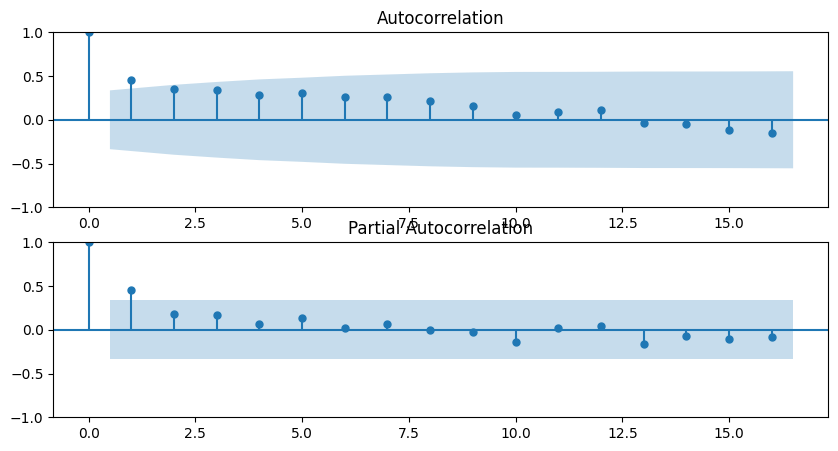

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot as plt

plt.figure(figsize=(10,5))

# Premier graphique : ACF
plt.subplot(211)
plot_acf(resample_df, ax=plt.gca())

# Deuxième graphique : PACF
plt.subplot(212)
plot_pacf(resample_df, ax=plt.gca())

plt.show()


In [52]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(resample_df, order=(1, 1, 1))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                   34
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -13.192
Date:                Fri, 08 Aug 2025   AIC                             32.384
Time:                        16:48:40   BIC                             36.873
Sample:                    12-31-1980   HQIC                            33.894
                         - 12-31-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1966      0.428      0.459      0.646      -0.642       1.035
ma.L1         -0.7337      0.375     -1.956      0.050      -1.469       0.001
sigma2         0.1283      0.027      4.669      0.0

2014-12-31    11.165476
2015-12-31    11.046407
2016-12-31    11.022997
2017-12-31    11.018395
2018-12-31    11.017490
Freq: YE-DEC, Name: predicted_mean, dtype: float64


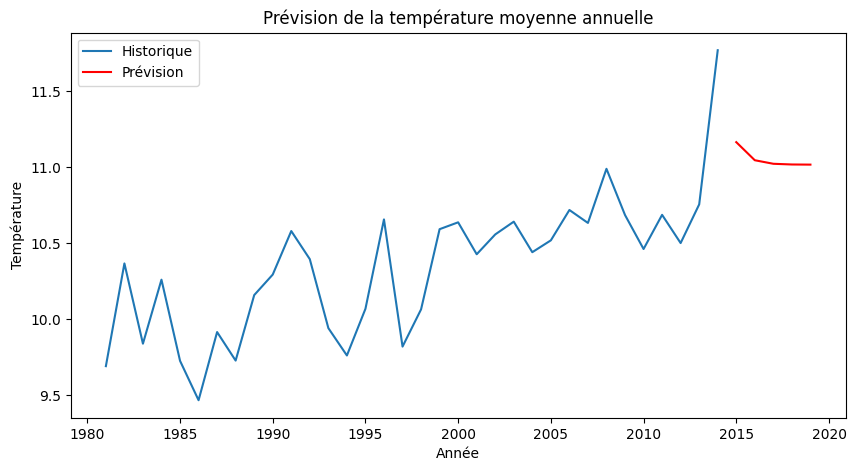

In [53]:
forecast = model_fit.forecast(steps=5)
print(forecast)

# 6. Visualisation des prévisions
plt.figure(figsize=(10,5))
plt.plot(resample_df, label='Historique')
plt.plot(forecast.index, forecast, label='Prévision', color='red')
plt.xlabel('Année')
plt.ylabel('Température')
plt.title('Prévision de la température moyenne annuelle')
plt.legend()
plt.show()